# **Milestone 1**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

In [ ]:
# Libraries for file operations
import zipfile
import os
import cv2

In [ ]:
# Libraries to display graphs
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [ ]:
import seaborn as sns

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
# Connecting to drive
from google.colab import drive
drive.mount('/content/drive/')

### **1. Import the data**

In [ ]:
# file_paths
car_images_path = "/content/drive/MyDrive/Capestone_AIML/Car_Detection/Car Images.zip"
annotations_file_path = "/content/drive/MyDrive/Capestone_AIML/Car_Detection/Annotations.zip"
car_names_file_path = "/content/drive/MyDrive/Capestone_AIML/Car_Detection/Car names and make.csv"

In [ ]:
# Car Names Data

car_names_df = pd.read_csv(car_names_file_path)

In [ ]:
car_names_df.head()

,AM General Hummer SUV 2000
0,Acura RL Sedan 2012
1,Acura TL Sedan 2012
2,Acura TL Type-S 2008
3,Acura TSX Sedan 2012
4,Acura Integra Type R 2001


In [ ]:
# Car Annotations Data

archive = zipfile.ZipFile(annotations_file_path)
archive.extractall()

In [ ]:
train_annotations_df = pd.read_csv("Annotations/Train Annotations.csv")
test_annotations_df = pd.read_csv("Annotations/Test Annotation.csv")

In [ ]:
train_annotations_df.shape, train_annotations_df.head()

((8144, 6),
   Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
 0  00001.jpg                        39         116         569         375   
 1  00002.jpg                        36         116         868         587   
 2  00003.jpg                        85         109         601         381   
 3  00004.jpg                       621         393        1484        1096   
 4  00005.jpg                        14          36         133          99   
 
    Image class  
 0           14  
 1            3  
 2           91  
 3          134  
 4          106  )

In [ ]:
test_annotations_df.shape, test_annotations_df.head()

((8041, 6),
   Image Name  Bounding Box coordinates  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
 0  00001.jpg                        30          52         246         147   
 1  00002.jpg                       100          19         576         203   
 2  00003.jpg                        51         105         968         659   
 3  00004.jpg                        67          84         581         407   
 4  00005.jpg                       140         151         593         339   
 
    Image class  
 0          181  
 1          103  
 2          145  
 3          187  
 4          185  )

In [ ]:
# Car Images Data

car_images_archive = zipfile.ZipFile(car_images_path)
car_images_archive.extractall()

### **2. Map training and testing images to its classes.**

In [ ]:
# Training data

train_images_dataset = "Car Images/Train Images"
image = []
image_name = []
car_class = []

# list all folders inside train directory
for car_name in os.listdir(train_images_dataset):
    print(car_name)
    if car_name!= '.DS_Store':   #Specific to Mac
      for car_image_num in os.listdir(os.path.join(train_images_dataset, car_name)):
        # storing image species
        car_class.append(car_name)
        # read each image inside train directory one by one
        image_array = cv2.imread(os.path.join(train_images_dataset, car_name, car_image_num))
        image.append(image_array)
        image_name.append(car_image_num)

Audi R8 Coupe 2012
Audi TT Hatchback 2011
Toyota Sequoia SUV 2012
GMC Savana Van 2012
Audi TT RS Coupe 2012
BMW X5 SUV 2007
Ford Mustang Convertible 2007
Ford F-450 Super Duty Crew Cab 2012
Toyota Corolla Sedan 2012
Dodge Durango SUV 2012
Dodge Journey SUV 2012
Cadillac CTS-V Sedan 2012
Lamborghini Gallardo LP 570-4 Superleggera 2012
Ferrari 458 Italia Coupe 2012
Acura Integra Type R 2001
Dodge Dakota Club Cab 2007
Audi S4 Sedan 2007
Cadillac SRX SUV 2012
HUMMER H2 SUT Crew Cab 2009
Buick Verano Sedan 2012
Chevrolet Silverado 1500 Regular Cab 2012
Hyundai Sonata Sedan 2012
Toyota Camry Sedan 2012
Audi A5 Coupe 2012
Infiniti QX56 SUV 2011
BMW 3 Series Sedan 2012
Honda Odyssey Minivan 2012
Lamborghini Reventon Coupe 2008
HUMMER H3T Crew Cab 2010
GMC Canyon Extended Cab 2012
Chevrolet Impala Sedan 2007
Suzuki SX4 Hatchback 2012
BMW 1 Series Convertible 2012
Acura TL Type-S 2008
Acura TL Sedan 2012
Ram C-V Cargo Van Minivan 2012
BMW M3 Coupe 2012
Ford Freestar Minivan 2007
smart fortwo Con

In [ ]:
# Checking length of each list before creating the training dataframe
print(len(car_class), len(image_name), len(image))  

8144 8144 8144


In [ ]:
train_image_df = pd.DataFrame()
train_image_df['Image_Name'] = image_name
train_image_df['Image_Class'] = car_class
train_image_df['Actual_Image'] = image

In [ ]:
train_image_df.head()

,Image_Name,Image_Class,Actual_Image
0,00450.jpg,Audi R8 Coupe 2012,"[[[112, 116, 104], [108, 113, 104], [105, 114,..."
1,00936.jpg,Audi R8 Coupe 2012,"[[[238, 235, 237], [238, 235, 237], [238, 235,..."
2,03215.jpg,Audi R8 Coupe 2012,"[[[181, 194, 208], [181, 194, 208], [181, 194,..."
3,02325.jpg,Audi R8 Coupe 2012,"[[[49, 62, 70], [49, 62, 70], [48, 61, 69], [4..."
4,01486.jpg,Audi R8 Coupe 2012,"[[[202, 190, 178], [200, 188, 176], [198, 186,..."


In [ ]:
# Number of recors for each classes
num_classes_data = pd.DataFrame(train_image_df['Image_Class'].value_counts())
num_classes_data

,Image_Class
GMC Savana Van 2012,68
Chrysler 300 SRT-8 2010,49
Mitsubishi Lancer Sedan 2012,48
Mercedes-Benz 300-Class Convertible 1993,48
Jaguar XK XKR 2012,47
...,...
Rolls-Royce Phantom Drophead Coupe Convertible 2012,31
Chevrolet Express Cargo Van 2007,30
Maybach Landaulet Convertible 2012,29
FIAT 500 Abarth 2012,28


**EDA Train Data**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


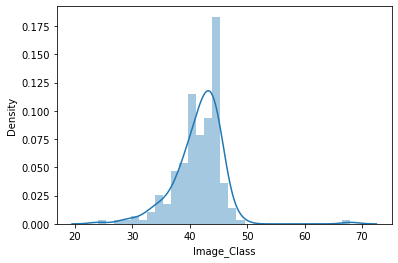

In [ ]:
# Distribution of Number of classes
sns.distplot(a=num_classes_data['Image_Class']);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


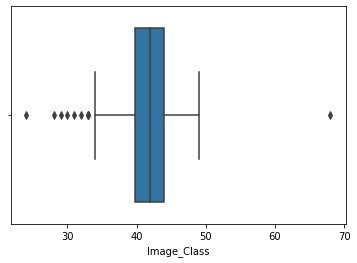

In [ ]:
# Box plot of Number of classes
sns.boxplot(num_classes_data['Image_Class']);

In [ ]:
# Finding car names data
num_classes_data.reset_index(inplace=True)

In [ ]:
# Deriving New Features For Car Company, Car Model, Car Manufacturing Year
company = []
car_model = []
mfg_year = []

for index, row in num_classes_data.iterrows():
  split_row = row['index'].split()
  company.append(split_row[0])
  mfg_year.append(split_row[-1])
  car_model.append(' '.join(split_row[1:-1]))

num_classes_data['Company'] = company
num_classes_data['Car_Model'] = car_model
num_classes_data['Mfg_Year'] = mfg_year

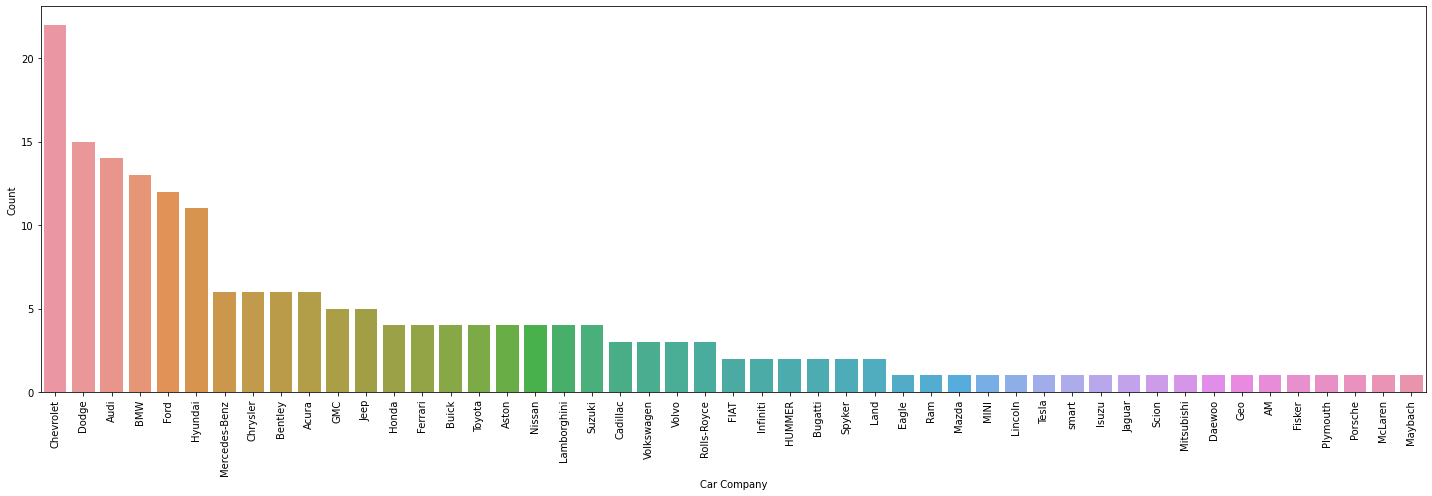

In [ ]:
# Graph of Car Company vs Count of Car models

car_company_data = pd.DataFrame(num_classes_data['Company'].value_counts())
car_company_data.reset_index(inplace=True)
plt.figure(figsize=(20, 7))
ax = sns.barplot(data=car_company_data, x='index', y='Company')
plt.xticks(rotation=90)
ax.set(xlabel='Car Company', ylabel='Count')
plt.tight_layout()
plt.show()

**Analysis**

1.   Chevrolet has highest numbers of car
2.   Maybach, McLaren, Porshe and 16 others company has lowest number of cars



In [ ]:
# Analysis

# Car models manufactured by "Chevrolet"
num_classes_data[num_classes_data['Company'] == "Chevrolet"][['Car_Model', 'Mfg_Year']]


,Car_Model,Mfg_Year
5,Corvette ZR1,2012
19,Camaro Convertible,2012
21,Monte Carlo Coupe,2007
30,Avalanche Crew Cab,2012
33,Malibu Sedan,2007
43,Silverado 1500 Regular Cab,2012
49,Sonic Sedan,2012
50,Traverse SUV,2012
51,Silverado 1500 Extended Cab,2012
73,Impala Sedan,2007


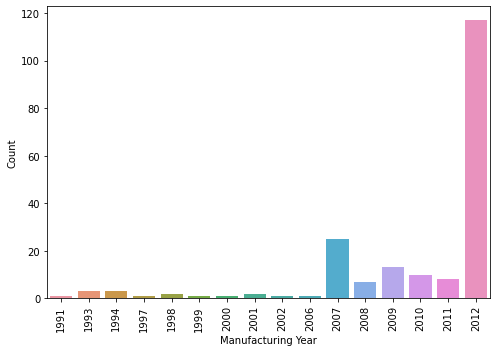

In [ ]:
# Graph of Manufacturing Year vs Count of Car models

plt.figure(figsize=(7, 5))
ax = sns.countplot(x=num_classes_data["Mfg_Year"], order=np.unique(num_classes_data["Mfg_Year"]))
plt.xticks(rotation=90)
ax.set(xlabel='Manufacturing Year', ylabel='Count')
plt.tight_layout()
plt.show()

**Analysis**

1.   Oldest car was manufactured in year 1991
2.   Earliest car was manufactured in year 2012



In [ ]:
# Analysis

# 1. Car Manufactured in year "1991"
num_classes_data[num_classes_data['Mfg_Year'] == "1991"]

,index,Image_Class,Company,Car_Model,Mfg_Year
6,Volkswagen Golf Hatchback 1991,46,Volkswagen,Golf Hatchback,1991


In [ ]:
# Test data

test_images_dataset = "Car Images/Test Images"
image = []
image_name = []
car_class = []

# list all folders inside train directory
for car_name in os.listdir(test_images_dataset):
    print(car_name)
    if car_name!= '.DS_Store':   #Specific to Mac
      for car_image_num in os.listdir(os.path.join(test_images_dataset, car_name)):
        # storing image species
        car_class.append(car_name)
        # read each image inside train directory one by one
        image_array = cv2.imread(os.path.join(test_images_dataset, car_name, car_image_num))
        image.append(image_array)
        image_name.append(car_image_num)

Audi R8 Coupe 2012
Audi TT Hatchback 2011
Toyota Sequoia SUV 2012
GMC Savana Van 2012
Audi TT RS Coupe 2012
BMW X5 SUV 2007
Ford Mustang Convertible 2007
Ford F-450 Super Duty Crew Cab 2012
Toyota Corolla Sedan 2012
Dodge Durango SUV 2012
Dodge Journey SUV 2012
Cadillac CTS-V Sedan 2012
Lamborghini Gallardo LP 570-4 Superleggera 2012
Ferrari 458 Italia Coupe 2012
Acura Integra Type R 2001
Dodge Dakota Club Cab 2007
Audi S4 Sedan 2007
Cadillac SRX SUV 2012
HUMMER H2 SUT Crew Cab 2009
Buick Verano Sedan 2012
Chevrolet Silverado 1500 Regular Cab 2012
Hyundai Sonata Sedan 2012
Toyota Camry Sedan 2012
Audi A5 Coupe 2012
Infiniti QX56 SUV 2011
BMW 3 Series Sedan 2012
Honda Odyssey Minivan 2012
Lamborghini Reventon Coupe 2008
HUMMER H3T Crew Cab 2010
GMC Canyon Extended Cab 2012
Chevrolet Impala Sedan 2007
Suzuki SX4 Hatchback 2012
BMW 1 Series Convertible 2012
Acura TL Type-S 2008
Acura TL Sedan 2012
Ram C-V Cargo Van Minivan 2012
BMW M3 Coupe 2012
Ford Freestar Minivan 2007
smart fortwo Con

In [ ]:
print(len(car_class), len(image_name), len(image))  # 

8041 8041 8041


In [ ]:
test_image_df = pd.DataFrame()
test_image_df['Image_Name'] = image_name
test_image_df['Image_Class'] = car_class
test_image_df['Actual_Image'] = image

In [ ]:
test_image_df.head()

,Image_Name,Image_Class,Actual_Image
0,08029.jpg,Audi R8 Coupe 2012,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ..."
1,00869.jpg,Audi R8 Coupe 2012,"[[[100, 100, 100], [100, 100, 100], [100, 100,..."
2,05834.jpg,Audi R8 Coupe 2012,"[[[107, 107, 91], [108, 108, 92], [112, 110, 9..."
3,05535.jpg,Audi R8 Coupe 2012,"[[[36, 43, 46], [37, 44, 47], [40, 48, 48], [3..."
4,00957.jpg,Audi R8 Coupe 2012,"[[[130, 92, 57], [118, 80, 45], [118, 80, 45],..."


### **3. Map training and testing images to its annotations.**

In [ ]:
# Mapping train images to it's annotations on Image_Name

train_image_df

,Image_Name,Image_Class,Actual_Image
0,00450.jpg,Audi R8 Coupe 2012,"[[[112, 116, 104], [108, 113, 104], [105, 114,..."
1,00936.jpg,Audi R8 Coupe 2012,"[[[238, 235, 237], [238, 235, 237], [238, 235,..."
2,03215.jpg,Audi R8 Coupe 2012,"[[[181, 194, 208], [181, 194, 208], [181, 194,..."
3,02325.jpg,Audi R8 Coupe 2012,"[[[49, 62, 70], [49, 62, 70], [48, 61, 69], [4..."
4,01486.jpg,Audi R8 Coupe 2012,"[[[202, 190, 178], [200, 188, 176], [198, 186,..."
...,...,...,...
8139,01940.jpg,Rolls-Royce Phantom Sedan 2012,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
8140,02572.jpg,Rolls-Royce Phantom Sedan 2012,"[[[228, 237, 234], [228, 237, 234], [229, 238,..."
8141,00048.jpg,Rolls-Royce Phantom Sedan 2012,"[[[210, 206, 188], [213, 209, 191], [210, 205,..."
8142,07506.jpg,Rolls-Royce Phantom Sedan 2012,"[[[140, 154, 150], [136, 150, 146], [138, 152,..."


In [ ]:
train_annotations_df

,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106
...,...,...,...,...,...,...
8139,08140.jpg,3,44,423,336,78
8140,08141.jpg,138,150,706,523,196
8141,08142.jpg,26,246,660,449,163
8142,08143.jpg,78,526,1489,908,112


In [ ]:
train_data = train_image_df.merge(train_annotations_df, how="inner", left_on="Image_Name", right_on="Image Name")
train_data

,Image_Name,Image_Class,Actual_Image,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
0,00450.jpg,Audi R8 Coupe 2012,"[[[112, 116, 104], [108, 113, 104], [105, 114,...",00450.jpg,57,59,506,288,15
1,00936.jpg,Audi R8 Coupe 2012,"[[[238, 235, 237], [238, 235, 237], [238, 235,...",00936.jpg,8,13,644,255,15
2,03215.jpg,Audi R8 Coupe 2012,"[[[181, 194, 208], [181, 194, 208], [181, 194,...",03215.jpg,25,140,537,329,15
3,02325.jpg,Audi R8 Coupe 2012,"[[[49, 62, 70], [49, 62, 70], [48, 61, 69], [4...",02325.jpg,34,51,382,258,15
4,01486.jpg,Audi R8 Coupe 2012,"[[[202, 190, 178], [200, 188, 176], [198, 186,...",01486.jpg,91,127,284,186,15
...,...,...,...,...,...,...,...,...,...
8139,01940.jpg,Rolls-Royce Phantom Sedan 2012,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",01940.jpg,1,7,200,125,177
8140,02572.jpg,Rolls-Royce Phantom Sedan 2012,"[[[228, 237, 234], [228, 237, 234], [229, 238,...",02572.jpg,6,102,609,410,177
8141,00048.jpg,Rolls-Royce Phantom Sedan 2012,"[[[210, 206, 188], [213, 209, 191], [210, 205,...",00048.jpg,142,69,753,451,177
8142,07506.jpg,Rolls-Royce Phantom Sedan 2012,"[[[140, 154, 150], [136, 150, 146], [138, 152,...",07506.jpg,18,128,607,398,177


In [ ]:
# Mapping test images to it's annotations on Image_Name

test_data = test_image_df.merge(test_annotations_df, how="inner", left_on="Image_Name", right_on="Image Name")
test_data

,Image_Name,Image_Class,Actual_Image,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
0,08029.jpg,Audi R8 Coupe 2012,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...",08029.jpg,158,200,1457,934,15
1,00869.jpg,Audi R8 Coupe 2012,"[[[100, 100, 100], [100, 100, 100], [100, 100,...",00869.jpg,46,71,926,629,15
2,05834.jpg,Audi R8 Coupe 2012,"[[[107, 107, 91], [108, 108, 92], [112, 110, 9...",05834.jpg,133,116,930,558,15
3,05535.jpg,Audi R8 Coupe 2012,"[[[36, 43, 46], [37, 44, 47], [40, 48, 48], [3...",05535.jpg,175,280,1486,1036,15
4,00957.jpg,Audi R8 Coupe 2012,"[[[130, 92, 57], [118, 80, 45], [118, 80, 45],...",00957.jpg,136,499,1450,1045,15
...,...,...,...,...,...,...,...,...,...
8036,06155.jpg,Rolls-Royce Phantom Sedan 2012,"[[[166, 165, 155], [170, 169, 159], [171, 169,...",06155.jpg,101,210,587,419,177
8037,07676.jpg,Rolls-Royce Phantom Sedan 2012,"[[[210, 198, 194], [210, 198, 194], [210, 198,...",07676.jpg,1,32,300,176,177
8038,00975.jpg,Rolls-Royce Phantom Sedan 2012,"[[[25, 27, 21], [23, 23, 17], [21, 17, 12], [3...",00975.jpg,12,48,280,170,177
8039,07484.jpg,Rolls-Royce Phantom Sedan 2012,"[[[26, 21, 22], [26, 21, 22], [25, 20, 21], [2...",07484.jpg,20,20,272,167,177


### **4. Display images with bounding box.**

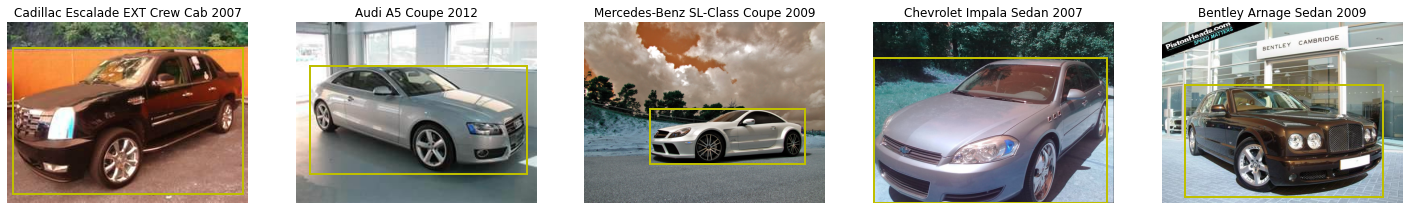

In [ ]:
# This method will display n random images with bounding box

def print_random_images(data, num_images=5):
  upper_range = len(data)
  random_num =  np.random.randint(1, high=upper_range, size=num_images)
  N = len(random_num)

  plt.figure(figsize=(N*5, 5))
  for itr in range(N):
      plt.subplot(1, N, itr+1)
      plt.imshow(data['Actual_Image'][random_num[itr]])  # greens, reds, blues, rgb
      # Add the patch to the Axes
      x = data['Bounding Box coordinates'][random_num[itr]]
      y = data['Unnamed: 2'][random_num[itr]]
      w = data['Unnamed: 3'][random_num[itr]] - x
      h = data['Unnamed: 4'][random_num[itr]] - y
      plt.gca().add_patch(Rectangle((x, y), width=w, height=h, linewidth=2, edgecolor='y', facecolor='none'))
      plt.title("{}".format(data['Image_Class'][random_num[itr]]))
      plt.axis('off')
  plt.show()

print_random_images(train_data, num_images=5)

### **5. Design, train and test basic CNN models to classify the car.**

**Create X & Y from the DataFrame**

Checking if each image has 3 channels i.e. RGB

In [ ]:
for index, row in train_data.iterrows():
  if row['Actual_Image'].shape[2] != 3:
    print(index)

In [ ]:
for index, row in test_data.iterrows():
  if row['Actual_Image'].shape[2] != 3:
    print(index)

In [ ]:
# resizing image
def resize_image_and_coordinates(row):
  image_array = row['Actual_Image']
  image_array_shape = image_array.shape

  #resizing image
  image_new_size = 128
  resized_image = cv2.resize(image_array, (image_new_size, image_new_size))
  #normalizing image
  resized_image = resized_image.astype('float32')
  resized_image = resized_image / 255.

  resized_image = np.array(resized_image)

  x1_old = row['Bounding Box coordinates']
  y1_old = row['Unnamed: 2']
  x2_old = row['Unnamed: 3']
  y2_old = row['Unnamed: 4']

  x_compression = image_new_size / image_array_shape[1]
  y_compression = image_new_size / image_array_shape[0]

  x1_new = int(x1_old * x_compression)
  y1_new = int(y1_old * y_compression)
  x2_new = int(x2_old * x_compression)
  y2_new = int(y2_old * y_compression)

  resized_bounding_box_cord = [x1_new, y1_new, x2_new, y2_new]

  return resized_image, resized_bounding_box_cord

**Training data**

In [ ]:
# iterating over Training data to reshape them
X_train_res = []
X_train_res_bound_box = []
for index, row in train_data.iterrows():
  X_new, X_new_bound_box = resize_image_and_coordinates(row)
  X_train_res.append(X_new)
  X_train_res_bound_box.append(X_new_bound_box)

X_train = np.array(X_train_res)
X_train_bound_box = np.array(X_train_res_bound_box)

In [ ]:
# Number of classes
train_data['Image class'].nunique()

196

In [ ]:
np.unique(train_data['Image class'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
y_train = pd.get_dummies(train_data['Image class']).values

In [ ]:
y_train.shape

(8144, 196)

In [ ]:
X_train.shape, y_train.shape

((8144, 128, 128, 3), (8144, 196))

**Testing data**

In [ ]:
# iterating over Tresting data to reshape them
X_test_res = []
X_test_res_bound_box = []
for index, row in test_data.iterrows():
  X_new, X_new_bound_box = resize_image_and_coordinates(row)
  X_test_res.append(X_new)
  X_test_res_bound_box.append(X_new_bound_box)

X_test = np.array(X_test_res)
X_test_bound_box = np.array(X_test_res_bound_box)

In [ ]:
# Number of classes
test_data['Image class'].nunique()

196

In [ ]:
np.unique(test_data['Image class'])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
y_test = pd.get_dummies(test_data['Image class']).values

In [ ]:
X_test.shape, y_test.shape

((8041, 128, 128, 3), (8041, 196))

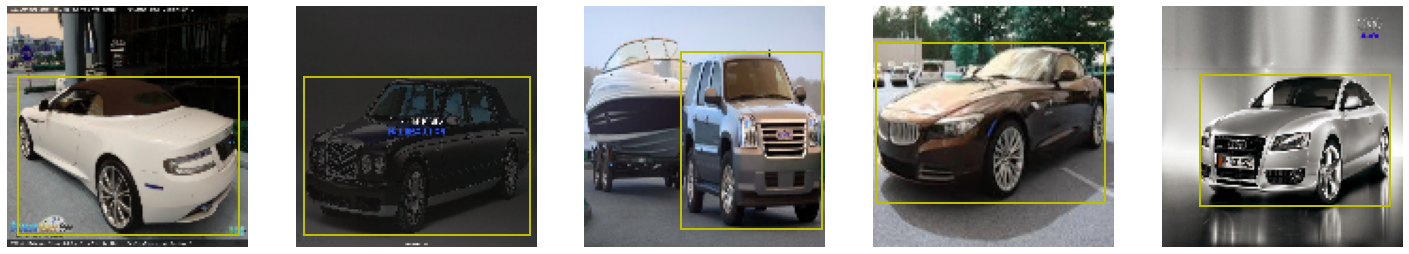

In [ ]:
# this method will display Reshaped  images with bounding box

def print_random_images(data_image_array, data_bounding_box, num_images=5):
  upper_range = len(data_image_array)
  random_num =  np.random.randint(1, high=upper_range, size=num_images)
  N = len(random_num)

  plt.figure(figsize=(N*5, 5))
  for itr in range(N):
      plt.subplot(1, N, itr+1)
      plt.imshow(data_image_array[random_num[itr]])  # greens, reds, blues, rgb
      # Add the patch to the Axes
      x = data_bounding_box[random_num[itr]][0]
      y = data_bounding_box[random_num[itr]][1]
      w = data_bounding_box[random_num[itr]][2] - x
      h = data_bounding_box[random_num[itr]][3] - y
      plt.gca().add_patch(Rectangle((x, y), width=w, height=h, linewidth=2, edgecolor='y', facecolor='none'))
      plt.axis('off')
  plt.show()

print_random_images(X_test, X_test_bound_box, num_images=5)

In [ ]:
# Deleting redundant variables to free RAM
del archive

**CNN Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten
import tensorflow as tf
from keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D, RandomFlip, RandomRotation, RandomZoom, Rescaling, Conv2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.utils import image_dataset_from_directory 

Using Keras Library to Load and Preprocess data

In [ ]:
# initializing variables related to image data

batch_size = 32  # batch size
img_height = 160
img_width = 160
train_data_dir = "Car Images/Train Images"
test_data_dir = "Car Images/Test Images"

In [ ]:
# reading train data from directory
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8144 files belonging to 196 classes.


In [ ]:
class_names = train_ds.class_names

In [ ]:
# reading test data from directory
val_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8041 files belonging to 196 classes.


In [ ]:
# Data Augmentation Layer
data_augmentation = tf.keras.Sequential(
  [
    RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
    RandomRotation(0.2),
    RandomZoom(0.1),
  ]
)

In [ ]:
num_classes = 196

model = Sequential([
  data_augmentation,  # adding augmentation layer
  Rescaling(1./255),  # adding rescaling layer
  # 1 Conv Layer
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  # 2 Conv Layer
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.1),
  # 3 Conv Layer
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.2),
  # 4 Conv Layer
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.2),


  Flatten(),

  # 1 Fully Connected Layer
  Dense(128, activation='relu'),
  Dropout(0.1),
  # 1 Fully Connected Layer
  Dense(64, activation='relu'),
  # The final output layer with 196 neuron to predict the categorical classifcation
  Dense(num_classes, name="outputs", activation = 'softmax')
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
255/255 [==============================] - 35s 132ms/step - loss: 5.2740 - accuracy: 0.0054 - val_loss: 5.2333 - val_accuracy: 0.0062
Epoch 2/30
255/255 [==============================] - 33s 129ms/step - loss: 5.1863 - accuracy: 0.0080 - val_loss: 5.1447 - val_accuracy: 0.0114
Epoch 3/30
255/255 [==============================] - 34s 129ms/step - loss: 5.1373 - accuracy: 0.0122 - val_loss: 5.1805 - val_accuracy: 0.0101
Epoch 4/30
255/255 [==============================] - 33s 128ms/step - loss: 5.1153 - accuracy: 0.0133 - val_loss: 5.2242 - val_accuracy: 0.0108
Epoch 5/30
255/255 [==============================] - 33s 128ms/step - loss: 5.0999 - accuracy: 0.0140 - val_loss: 5.1628 - val_accuracy: 0.0126
Epoch 6/30
255/255 [==============================] - 34s 133ms/step - loss: 5.0736 - accuracy: 0.0181 - val_loss: 5.1425 - val_accuracy: 0.0144
Epoch 7/30
255/255 [==============================] - 33s 126ms/step - loss: 5.0297 - accuracy: 0.0212 - val_loss: 5.0891 - val_ac

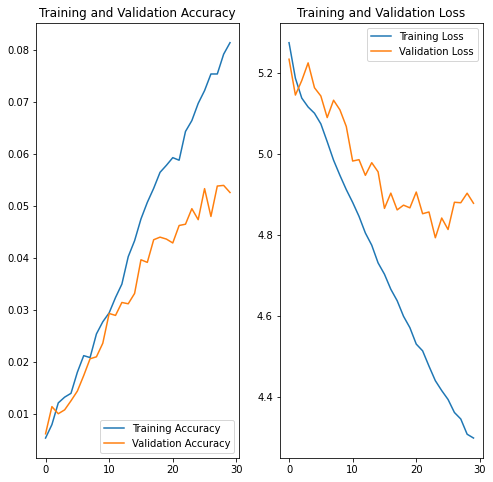

In [ ]:
# Visualizing model performance on Training and Validation data 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **Milestone 2**

### **1. Fine tune the trained basic CNN models to classify the car.**

In [ ]:
# Basic CNN Model to improve performance

num_classes = 196

model = Sequential([
  # Data Augmentation Layer
  RandomFlip("horizontal_and_vertical", input_shape=(img_height, img_width, 3)),
  RandomRotation(0.3),
  RandomZoom(0.2),
  Rescaling(1./255),  # adding rescaling layer
  # 1 Conv Layer
  Conv2D(16, 3, activation='relu'),
  AveragePooling2D(),
  BatchNormalization(),
  # 2 Conv Layer
  Conv2D(32, 3, activation='relu'),
  MaxPooling2D(),
  BatchNormalization(),
  Dropout(0.1),
  # 3 Conv Layer
  Conv2D(64, 3, activation='relu'),
  # AveragePooling2D(),
  BatchNormalization(),
  # Dropout(0.2),
  # 4 Conv Layer
  # Conv2D(64, 3, activation='relu'),
  # AveragePooling2D(),
  # BatchNormalization(),
  # Dropout(0.2),


  Flatten(),

  # 1 Fully Connected Layer
  Dense(128, activation='relu'),
  BatchNormalization(),
  Dropout(0.1),
  # 2 Fully Connected Layer
  Dense(64, activation='relu'),
  BatchNormalization(),
  # 3 Fully Connected Layer
  Dense(64, activation='relu'),
  # BatchNormalization(),
  # The final output layer with 196 neuron to predict the categorical classifcation
  Dense(num_classes, name="outputs", activation = 'softmax')
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_5 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_5 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_5 (RandomZoom)  (None, 128, 128, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 average_pooling2d_5 (Averag  (None, 63, 63, 16)       0         
 ePooling2D)                                          

In [ ]:
 # This callback will stop the training when there is no improvement in the loss for three consecutive epochs
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[callback]
)

Epoch 1/100
255/255 [==============================] - 38s 141ms/step - loss: 5.2927 - accuracy: 0.0097 - val_loss: 5.2877 - val_accuracy: 0.0058
Epoch 2/100
255/255 [==============================] - 37s 141ms/step - loss: 5.1450 - accuracy: 0.0166 - val_loss: 5.1418 - val_accuracy: 0.0177
Epoch 3/100
255/255 [==============================] - 34s 130ms/step - loss: 5.0672 - accuracy: 0.0196 - val_loss: 5.0553 - val_accuracy: 0.0206
Epoch 4/100
255/255 [==============================] - 34s 132ms/step - loss: 5.0096 - accuracy: 0.0242 - val_loss: 5.1910 - val_accuracy: 0.0204
Epoch 5/100
255/255 [==============================] - 34s 132ms/step - loss: 4.9636 - accuracy: 0.0289 - val_loss: 5.0919 - val_accuracy: 0.0249
Epoch 6/100
255/255 [==============================] - 34s 130ms/step - loss: 4.9068 - accuracy: 0.0366 - val_loss: 5.0452 - val_accuracy: 0.0311
Epoch 7/100
255/255 [==============================] - 35s 133ms/step - loss: 4.8632 - accuracy: 0.0359 - val_loss: 5.0808 -

Get 23% training and approximately 6% validation accuracy after adding few dense and Batch normalization layers over basic CNN model

**Transfer Learning**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Data Augmentation Layer
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

# model preprocessing layer
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# Global AveragePooling Layer
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

# Prediction layer
prediction_layer = tf.keras.layers.Dense(196)

In [ ]:
IMG_SHAPE = (160, 160) + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

# Freeze the base_model
base_model.trainable = False

inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
initial_epochs = 10

history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/10
255/255 [==============================] - 44s 132ms/step - loss: 8.9473 - accuracy: 0.0707 - val_loss: 6.5556 - val_accuracy: 0.1200
Epoch 2/10
255/255 [==============================] - 33s 126ms/step - loss: 7.8237 - accuracy: 0.1582 - val_loss: 7.3719 - val_accuracy: 0.1455
Epoch 3/10
255/255 [==============================] - 33s 126ms/step - loss: 7.9028 - accuracy: 0.1938 - val_loss: 7.8906 - val_accuracy: 0.1553
Epoch 4/10
255/255 [==============================] - 33s 126ms/step - loss: 7.5861 - accuracy: 0.2407 - val_loss: 7.8568 - val_accuracy: 0.1666
Epoch 5/10
255/255 [==============================] - 33s 128ms/step - loss: 7.4765 - accuracy: 0.2568 - val_loss: 7.9832 - val_accuracy: 0.1761
Epoch 6/10
255/255 [==============================] - 33s 127ms/step - loss: 7.2552 - accuracy: 0.2862 - val_loss: 8.7145 - val_accuracy: 0.1737
Epoch 7/10
255/255 [==============================] - 33s 127ms/step - loss: 7.2672 - accuracy: 0.2984 - val_loss: 8.8751 - val_ac

In [ ]:
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

epochs = 10
model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/10
255/255 [==============================] - 59s 207ms/step - loss: 3.1523 - accuracy: 0.4026 - val_loss: 4.7233 - val_accuracy: 0.2074
Epoch 2/10
255/255 [==============================] - 51s 199ms/step - loss: 2.3685 - accuracy: 0.4326 - val_loss: 4.5431 - val_accuracy: 0.2128
Epoch 3/10
255/255 [==============================] - 51s 198ms/step - loss: 2.1900 - accuracy: 0.4684 - val_loss: 4.4742 - val_accuracy: 0.2327
Epoch 4/10
255/255 [==============================] - 51s 199ms/step - loss: 2.0593 - accuracy: 0.4964 - val_loss: 4.3181 - val_accuracy: 0.2508
Epoch 5/10
255/255 [==============================] - 51s 200ms/step - loss: 1.9215 - accuracy: 0.5206 - val_loss: 4.2860 - val_accuracy: 0.2532
Epoch 6/10
255/255 [==============================] - 51s 200ms/step - loss: 1.8501 - accuracy: 0.5316 - val_loss: 4.2111 - val_accuracy: 0.2669
Epoch 7/10
255/255 [==============================] - 52s 201ms/step - loss: 1.7294 - accuracy: 0.5539 - val_loss: 4.2373 - val_ac

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

### **Saving the model**

In [ ]:
# saving the model
model.save("car_classification_model.h5")

In [ ]:
# Need pickle file to save the class names
import pickle

In [ ]:
# writing class names to a pickle file
with open('car_classes.pkl', 'wb') as f:
  pickle.dump(class_names, f)

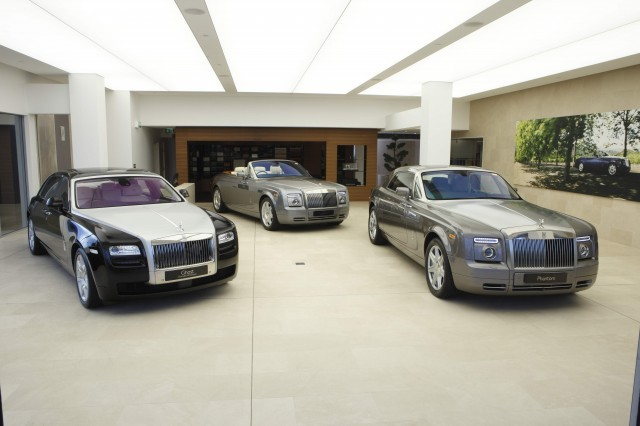

1/1 [==============================] - 1s 662ms/step
This image most likely belongs to Rolls-Royce Ghost Sedan 2012 with a 66.06 percent confidence.


In [ ]:
# Making a prediction by loading the model

model_pred = tf.keras.models.load_model('car_classification_model.h5')

img_height_pred = 160
img_width_pred = 160
img_path_pred = "/content/Car Images/Train Images/Rolls-Royce Ghost Sedan 2012/03250.jpg"
cv2_imshow(cv2.imread(img_path_pred))

img = tf.keras.utils.load_img(img_path_pred, target_size=(img_height_pred, img_height_pred))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_pred.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)